In [1]:
__author__ = "730163077"

In [2]:
%reload_ext autoreload
%autoreload 2

# Hypothesis: 
## I predict that more upperclassmen believe they will earn an A than first-year students. 
### I predict that students that have at least four prereqs believe they will earn an A. could be similar to less than mask

### First, we will read in the csv and convert it to a column-oriented data table.

In [3]:
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

In [4]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)
columns: dict[str, list[str]] = columnar(data_rows)

eqs': 'MATH 231, MATH 232, PSYC 210, STOR 155', 'prior_exp': 'None to less than one month!', 'AP_Principles': 'No', 'AP_A': 'No', 'other_comp': 'None', 'prior_time': 'None to less than one month!', 'languages': 'None', 'residency': 'In-state', 'on_campus': 'Yes', 'international': 'I am living in the United States', 'section': 'Section 1 - 3:30pm - Sync + Async', 'lesson_time': '6', 'sync_perf': '4', 'all_sync': '4', 'own_notes': '5', 'own_examples': '2', 'oh_visits': '1', 'ls_effective': '7', 'lsqs_effective': '7', 'programming_effective': '7', 'qz_effective': '7', 'oh_effective': '', 'tutoring_effective': '', 'kaki_effective': '6', 'pace': '6', 'difficulty': '6', 'understanding': '4', 'interested': '5', 'valuable': '6', 'grade': 'B', 'would_recommend': '7'}
{'row_number': '487', 'year': '21', 'unc_status': 'Returning UNC Student', 'comp_major': 'No', 'primary_major': 'Psychology', 'prereqs': 'MATH 130, MATH 231, PSYC 210', 'prior_exp': 'None to less than one month!', 'AP_Principles': 

### Now we will select the year and grade column. 

In [5]:
from data_utils import head, select

selection1: dict[str, list[str]] = select(columns, ["year"])
selection2: dict[str, list[str]] = select(columns, ["grade"])
print(selection1)

{'year': ['21', '23', '23', '23', '24', '22', '21', '23', '23', '23', '23', '24', '24', '24', '22', '24', '24', '23', '24', '22', '22', '24', '23', '23', '23', '22', '23', '24', '24', '24', '24', '24', '23', '24', '24', '23', '23', '24', '24', '22', '22', '22', '23', '22', '23', '24', '22', '24', '22', '24', '21', '24', '24', '24', '24', '23', '21', '24', '23', '23', '24', '24', '23', '24', '21', '24', '24', '22', '22', '24', '23', '24', '24', '23', '21', '24', '24', '24', '23', '22', '24', '24', '23', '24', '23', '23', '24', '24', '23', '23', '23', '24', '24', '24', '21', '23', '23', '23', '23', '24', '24', '24', '24', '24', '24', '24', '24', '22', '21', '24', '21', '24', '24', '24', '24', '23', '24', '22', '23', '22', '23', '23', '22', '23', '23', '23', '24', '24', '23', '22', '24', '24', '22', '24', '23', '24', '24', '23', '23', '23', '24', '24', '23', '24', '22', '21', '24', '22', '23', '24', '23', '24', '23', '22', '24', '24', '24', '24', '24', '24', '24', '22', '22', '24', '22', 

### I will count up the total number of people in each year and the total number of people for each grade believed to be earned.

In [6]:
from data_utils import count

year_counts: dict[str, int] = count(selection1["year"])
year_sorted_counts: dict[str, int] = dict(sorted(year_counts.items()))

print(f"year_counts: {year_sorted_counts}")
grade_counts: dict[str, int] = count(selection2["grade"])
print(f"grade_counts: {grade_counts}")

year_counts: {'21': 46, '22': 65, '23': 162, '24': 229}
grade_counts: {'A': 237, 'B': 211, 'C': 47, 'D': 7}


### We will use the counts to make a bar chart.

<BarContainer object of 4 artists>

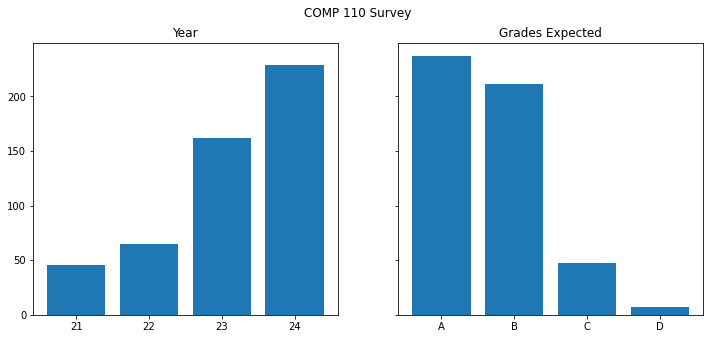

In [7]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("COMP 110 Survey")


axes[0].set_title("Year")
axes[0].bar(year_sorted_counts.keys(), year_sorted_counts.values())

axes[1].set_title("Grades Expected")
axes[1].bar(grade_counts.keys(), grade_counts.values())

### This mask will produce True / False statements as a result of whether the student is an upperclassman and believes they will earn an A. 

In [8]:
def mask(column: list[str], string: str) -> list[bool]:
    result: list[bool] = []
    for i in column:
         result.append(i == string)
    return result
mask1: list[bool] = mask(columns["grade"], "A")
mask2: list[bool] = mask(columns["year"], "24")
print (mask2)

[False, False, False, False, True, False, False, False, False, False, False, True, True, True, False, True, True, False, True, False, False, True, False, False, False, False, False, True, True, True, True, True, False, True, True, False, False, True, True, False, False, False, False, False, False, True, False, True, False, True, False, True, True, True, True, False, False, True, False, False, True, True, False, True, False, True, True, False, False, True, False, True, True, False, False, True, True, True, False, False, True, True, False, True, False, False, True, True, False, False, False, True, True, True, False, False, False, False, False, True, True, True, True, True, True, True, True, False, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, True, True, False, True, False, True, True, False, False, False, True, True, False, True, False, False, True, False, False, True, False, True, False,

### Trying to use mask for masked function to return when mask1 and mask2 are true. This will determine how many first years believe they will earn an A.

In [9]:
def masked(column: list[float], mask1: list[bool], mask2: list[bool]) -> list[float]:
    result: list[float] = []
    for i in column:
        if mask1[i] and mask2[i]: 
            result.append(col[i])
    return result

mask3: list[float] = masked(columns["grade"], mask1, mask2)
print(mask3)

TypeError: list indices must be integers or slices, not str